In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from DaySim import DaysimSummary

In [2]:
report = DaysimSummary()

runVehAvailability = True, loading data...
runWrkSchLocationChoice = True, loading data...
runTripMode = True, loading data...
runTourMode = True, loading data...
runTripDestination = True, loading data...
runTourDestination = True, loading data...
runTripTOD = True, loading data...
runTourTOD = True, loading data...
runDayPattern = True, loading data...


## Vehicle Availability

In [3]:
# by household income
report.summary_vehavail("inccat")

hhvehcat,0,1,2,3,4
inccat,,,,,
0K-15K,7350,11902,3591,865,240
15K-50K,3348,29217,22841,10550,6174
50K-75K,404,4905,14664,8782,6163
>75K,613,4427,22734,16117,13945


In [4]:
# by county
report.summary_vehavail("hhcounty")

hhvehcat,0,1,2,3,4
hhcounty,,,,,
1,16448,44585,49267,27693,19927
2,1146,7002,9475,5716,4396
3,99,934,487,221,195
4,785,4308,5106,2782,2018


In [5]:
# by household drivers
report.summary_vehavail("hh16cat")

hhvehcat,0,1,2,3,4
hh16cat,,,,,
0,24,3,3,0,0
1,15746,47296,7020,1593,0
2,2200,8586,51497,19465,10682
3,215,944,5086,11019,6707
4,293,0,729,4335,9147


## Work/School Location

<BarContainer object of 50 artists>

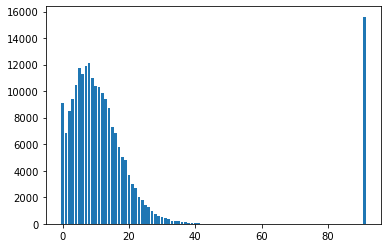

In [6]:
# work trip length
df = report.summary_wrkschloc_trip_length("wrkr")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['wrkdistcat'],height=(df['FT']+df['PT']+df['NotFTPT']))

<BarContainer object of 67 artists>

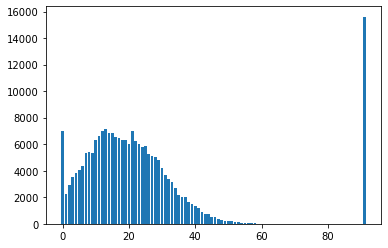

In [7]:
# work trip duration
df = report.summary_wrkschloc_trip_duration("wrkr")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['wrktimecat'],height=(df['FT']+df['PT']+df['NotFTPT']))

In [8]:
# work trip county flow
report.summary_wrkschloc_county_flow("wrkr")

pwcounty,1.0,2.0,3.0,4.0,13.0
hhcounty,,,,,
1,155899,2662,111,1583,8372
2,16356,8969,77,982,5409
3,1376,46,79,40,118
4,8797,2249,55,2217,1709


In [9]:
# work from home
report.summary_wrkschloc_at_home("wfh")

wrkrtyp,FT,PT,NotFTPT
hhcounty,,,
1,3133,1238,342
2,683,246,29
3,47,15,3
4,410,189,23


<BarContainer object of 45 artists>

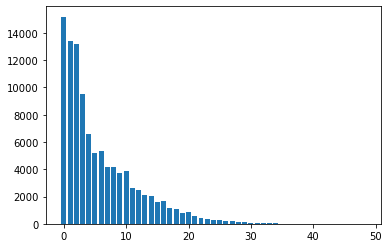

In [10]:
# school trip length
df = report.summary_wrkschloc_trip_length("stud")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['schdistcat'],height=(df['Ch515']+df['Stu16']+df['UniStu']))

<BarContainer object of 68 artists>

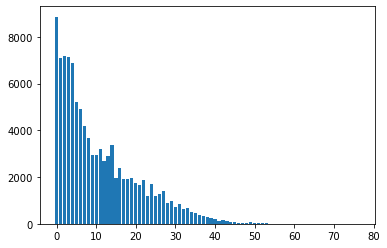

In [11]:
# school trip duration
df = report.summary_wrkschloc_trip_duration("stud")
df.columns = df.columns.astype(str)
df = df.reset_index()
plt.bar(x=df['schtimecat'],height=(df['Ch515']+df['Stu16']+df['UniStu']))

In [12]:
# school trip county flow
report.summary_wrkschloc_county_flow("stud")

pscounty,1.0,2.0,3.0,4.0
hhcounty,,,,
1,76012,1490,373,958
2,6531,8355,30,853
3,704,27,262,103
4,3087,866,93,3660


In [13]:
# school at home
report.summary_wrkschloc_at_home("sfh")

stutyp,Ch515,Stu16,UniStu
hhcounty,,,
1,2624,458,1016
2,504,66,66
3,28,1,0
4,252,23,43


## Trip Mode

In [14]:
# Work
report.summary_trip_mode(purpose=1) 
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

tourmode,Drive Alone,Shared Ride 2,Shared Ride 3+,Drive-Transit,Walk-Transit,Bike,Walk,School Bus
tripmode,,,,,,,,
Drive Alone,379663.0,44323.0,18171.0,571.0,12.0,0.0,0.0,0.0
Shared Ride 2,0.0,43963.0,8531.0,48.0,16.0,0.0,0.0,0.0
Shared Ride 3+,0.0,0.0,30107.0,0.0,7.0,0.0,0.0,0.0
Transit-local bus,0.0,0.0,0.0,470.0,273.0,0.0,0.0,0.0
Transit-light rail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transit-premium bus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transit-commuter rail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transit-ferry,0.0,0.0,0.0,2.0,9.0,0.0,0.0,0.0
School Bus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tour Mode

In [15]:
# Work
report.summary_tour_mode(purpose=1)
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

vehcat,0-Veh HHs,>0-Veh HHs
tourmode,,
Drive Alone,0.0,132565.0
Shared Ride 2,292.0,23496.0
Shared Ride 3+,215.0,13955.0
Drive-Transit,20.0,216.0
Walk-Transit,81.0,89.0
Bike,80.0,79.0
Walk,882.0,1044.0
School Bus,0.0,0.0


## Trip Destination

<BarContainer object of 50 artists>

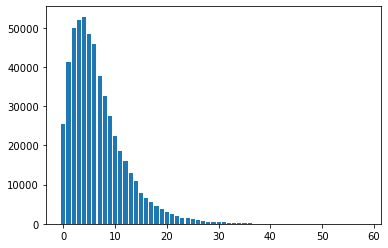

In [16]:
# trip length by trip purpose
df = report.summary_trip_destination("distcat").reset_index()
plt.bar(x=df['distcat'],height=df[0]) 
# 0-non/home  1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 90 artists>

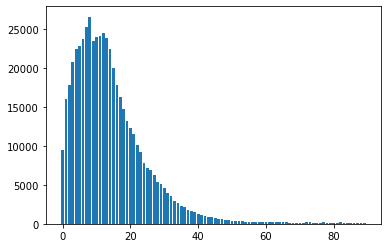

In [17]:
# trip duration by trip purpose
df = report.summary_trip_destination("timecat").reset_index()
plt.bar(x=df['timecat'],height=df[0])
# 0-non/home  1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

## Tour Destination

<BarContainer object of 49 artists>

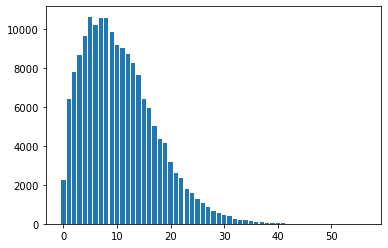

In [18]:
# tour length by tour purpose
df = report.summary_tour_destination("distcat").reset_index()
plt.bar(x=df['distcat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

<BarContainer object of 70 artists>

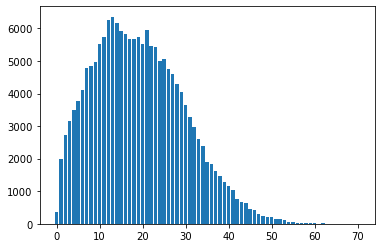

In [19]:
# tour duration by tour purpose
df = report.summary_tour_destination("timecat").reset_index()
plt.bar(x=df['timecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

In [20]:
# tour county flow by tour purpose
report.summary_tour_destination_county_flow(purpose=1)
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

dcounty,1,2,3,4
ocounty,,,,
1,132611,2561,84,1430
2,15134,7285,64,965
3,1209,37,15,36
4,8045,1991,38,1509


## Trip Time of Day

<BarContainer object of 43 artists>

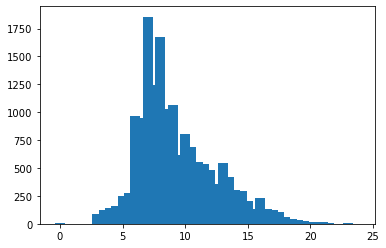

In [21]:
# Trip arrival time at stop location - outbound (first) half-tour
df = report.summary_trip_tod("arrtimecat",filter_by_var="arrflag").reset_index()
plt.bar(x=df['arrtimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 42 artists>

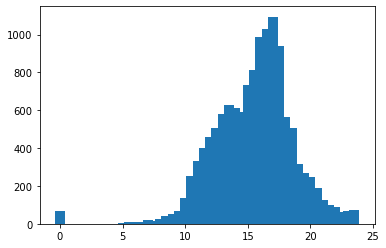

In [22]:
# Trip departure time at stop location - return (second) half-tour
df = report.summary_trip_tod("deptimecat",filter_by_var="depflag").reset_index()
plt.bar(x=df['deptimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 25 artists>

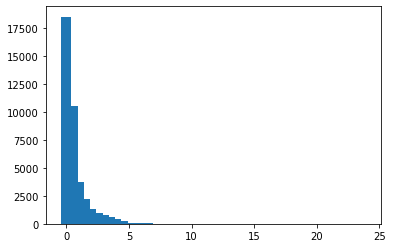

In [23]:
# Duration at stop location - both half-tours
df = report.summary_trip_tod("durdestcat",filter_by_var="durflag").reset_index()
plt.bar(x=df['durdestcat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 43 artists>

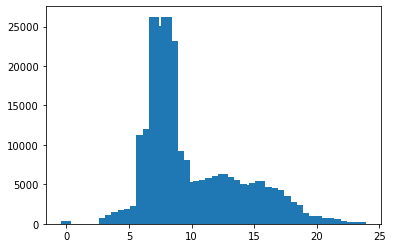

In [24]:
# Trip arrival time All
df = report.summary_trip_tod("arrtimecat",filter_by_var=False).reset_index()
plt.bar(x=df['arrtimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

<BarContainer object of 43 artists>

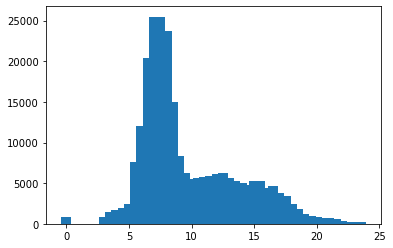

In [25]:
# Trip departure time All
df = report.summary_trip_tod("deptimecat",filter_by_var=False).reset_index()
plt.bar(x=df['deptimecat'],height=df[1])
# 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 10-change mode inserted purpose

## Tour Time of Day

<BarContainer object of 43 artists>

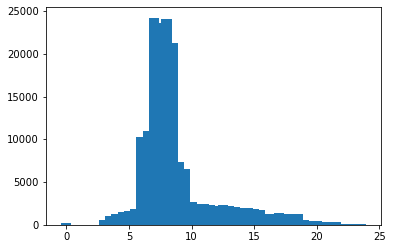

In [26]:
# arrival time all trip purposes
df = report.summary_tour_tod("arrtimecat").reset_index()
plt.bar(x=df['arrtimecat'],height=df[1]) 
# 1 Work 2 School 3 Other 4 Workbased

<BarContainer object of 43 artists>

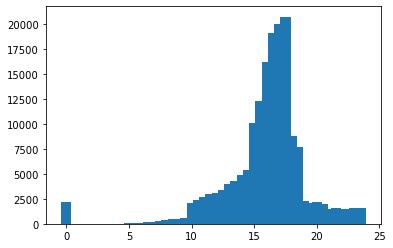

In [27]:
# departure time all trip purposes
df = report.summary_tour_tod("deptimecat").reset_index()
plt.bar(x=df['deptimecat'],height=df[1]) 
# 1 Work 2 School 3 Other 4 Workbased

<BarContainer object of 40 artists>

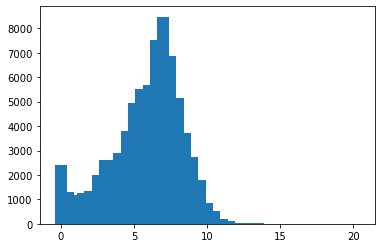

In [28]:
# duration all trip purposes
df = report.summary_tour_tod("durdestcat").reset_index()
plt.bar(x=df['durdestcat'],height=df[2]) 
# 1 Work 2 School 3 Other 4 Workbased

In [29]:
# arrival time by trip purpose by person type
report.summary_tour_tod_purpose("arrtimecat", purpose=2).reset_index()
# purpose: 1 Work 2 School 3 Other 4 Workbased
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,arrtimecat,1,2,3,4,5,6,7,8
0,3.5,0,0.0,0.0,0.0,0,0,1,0.0
1,5.5,0,0.0,0.0,0.0,0,5,14,0.0
2,6.0,1,0.0,0.0,0.0,38,225,704,0.0
3,6.5,2,0.0,0.0,0.0,45,245,825,0.0
4,7.0,92,0.0,0.0,0.0,709,3043,11736,0.0
5,7.5,86,0.0,0.0,0.0,808,2360,10311,0.0
6,8.0,143,0.0,0.0,0.0,1093,2288,11584,0.0
7,8.5,144,0.0,0.0,0.0,1140,1735,9949,0.0
8,9.0,43,0.0,0.0,0.0,342,350,2468,0.0
9,9.5,49,0.0,0.0,0.0,361,312,2358,0.0


In [30]:
# departure time by trip purpose by person type
report.summary_tour_tod_purpose("deptimecat", purpose=2).reset_index()
# purpose: 1 Work 2 School 3 Other 4 Workbased
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,deptimecat,1,2,3,4,5,6,7,8
0,0.0,0,0.0,0.0,0.0,2,0,1,0.0
1,6.5,0,0.0,0.0,0.0,0,2,0,0.0
2,7.0,0,0.0,0.0,0.0,9,110,156,0.0
3,7.5,1,0.0,0.0,0.0,13,84,156,0.0
4,8.0,0,0.0,0.0,0.0,24,53,164,0.0
5,8.5,1,0.0,0.0,0.0,24,27,152,0.0
6,9.0,1,0.0,0.0,0.0,20,16,137,0.0
7,9.5,0,0.0,0.0,0.0,32,15,180,0.0
8,10.0,5,0.0,0.0,0.0,131,117,881,0.0
9,10.5,7,0.0,0.0,0.0,156,130,987,0.0


## Person Day Pattern

In [31]:
# number of tours by person type
report.summary_day_pattern_num_of_tours()
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,1,2,3,4,5,6,7
tottours,,,,,,,
0,21528,1981,21197,17960,11208,4561,1457
1,109365,12673,27385,39877,9769,8940,38483
2,36568,9003,10194,18684,3803,3227,16398
3,8199,3794,3269,9213,1069,737,3752


In [32]:
# tour/stop combinations by person type
report.summary_day_pattern_tour_stops()
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: tours/stops
# 0 0/0
# 1 1/0
# 2 1/1
# 3 1/2
# 4 1/3+
# 5 2/0
# 6 2/1
# 7 2/2
# 8 2/3+
# 9 3+/0
# 10 3+/1
# 11 3+/2
# 12 3+/3+

pptyp,1,2,3,4,5,6,7
tourstop,,,,,,,
0,21528,1981,21197,17960,11208,4561,1457
1,16746,4,7429,7888,4316,4087,5855
2,32858,209,8819,12006,3397,2567,12064
3,31221,2045,8068,13963,1468,1629,11049
4,28540,10415,3069,6020,588,657,9515
5,4907,32,2303,3043,1325,986,2557
6,11176,496,3237,5396,1420,1020,5470
7,11537,2654,3368,6771,782,871,5108
8,8948,5821,1286,3474,276,350,3263


In [33]:
# tour/stop combinations by purpose by person type
report.summary_day_pattern_tour_stops_by_purpose(purpose="wktostp")
# purpose: "wktostp", "sctostp", "estostp", "pbtostp", "shtostp", "mlstops", "sotostp"
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: tours/stops
# 1 0/0
# 2 0/1+
# 3 1+/0
# 4 1+/1+

pptyp,1,2,3,4,5,6,7
wktostp,,,,,,,
1,36374,8857,62045,85734,23214,15352,60090
2,869,0,0,0,781,1177,0
3,93423,14382,0,0,1312,609,0
4,44994,4212,0,0,542,327,0


In [34]:
# tours by purpose by person type
report.summary_day_pattern_tours_by_purpose(purpose="wktopt")
# purpose: "wktopt", "sctopt", "estopt", "pbtopt", "shtopt", "mltopt", "sotopt"
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: 0,1,2,3+

pptyp,1,2,3,4,5,6,7
wktopt,,,,,,,
0,37243,8857,62045,85734,23995,16529,60090
1,127595,16938,0,0,1749,851,0
2,10354,1583,0,0,102,84,0
3,468,73,0,0,3,1,0


In [35]:
# number of subtours (work tours only)
report.summary_day_pattern_subtours()
# columns: 1-FT 2-Other
# index: 0,1,2,3+

ftwind,1,2
stcat,,
0,135526,20484
1,19850,3149
2,1115,165
3,93,20


In [36]:
# number of subtours (work tours only) by purpose
report.summary_day_pattern_subtours_by_purpose()
# columns: 1-FT 2-Other
# index :1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational

ftwind,1,2
pdpurp,,
1,6877.0,511.0
2,0.0,0.0
3,589.0,168.0
4,4097.0,1110.0
5,1132.0,343.0
6,8606.0,1188.0
7,1086.0,235.0


In [37]:
# estimated tours by number of stops and purpose
report.summary_day_pattern_stops_by_tour_purpose("stopscat")
# columns: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational
# index: 0,1,2,3,4,5,6+

pdpurp,1,2,3,4,5,6,7
stopscat,,,,,,,
0,70074,32867,29584,51585,28306,27232,35806
1,55491,21995,21089,24548,14726,9074,12801
2,30877,12522,10991,10312,6890,2971,4518
3,14114,5355,4711,3397,2444,922,1382
4,6173,2103,1710,821,686,237,373
5,2284,679,573,155,157,43,67
6,1389,310,287,21,21,7,12


In [38]:
# estimated outbound tours by number of stops and purpose
report.summary_day_pattern_stops_by_tour_purpose("h1stopscat")
# columns: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational
# index: 0,1,2,3,4,5,6+

pdpurp,1,2,3,4,5,6,7
h1stopscat,,,,,,,
0,123097,55135,45346,68686,38511,32757,44052
1,40232,15259,16674,16716,10708,5918,8476
2,11892,4060,4980,4333,3084,1406,1874
3,3815,1101,1463,939,794,348,470
4,1034,217,361,147,109,52,78
5,209,34,79,12,20,4,6
6,123,25,42,6,4,1,3


In [39]:
# estimated return tours by number of stops and purpose
report.summary_day_pattern_stops_by_tour_purpose("h2stopscat")
# columns: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational
# index: 0,1,2,3,4,5,6+

pdpurp,1,2,3,4,5,6,7
h2stopscat,,,,,,,
0,97388,42304,42587,66145,37606,32865,43442
1,55101,22175,19299,19657,12268,6467,9535
2,19359,8313,5421,4230,2771,983,1646
3,5881,2223,1232,686,491,142,286
4,1966,629,302,112,82,25,46
5,356,101,63,7,7,4,3
6,351,86,41,2,5,0,1


In [40]:
# estimated total tours by purpose by person type
report.summary_day_pattern_tours_by_tour_purpose("pptyp")
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

pptyp,1,2,3,4,5,6,7
pdpurp2,,,,,,,
1,149707,20323,0,0,1962,1022,0
2,1228,0,0,0,7482,11549,55572
3,13541,8744,5585,30838,3624,1128,4728
4,12871,4442,20717,35641,3446,1107,7408
5,10186,3397,12770,20247,939,773,3443
6,9318,2252,6847,7445,1751,767,2312
7,11529,3969,12313,13271,1596,1370,9590
8,22387,3296,0,0,165,94,0


In [41]:
# estimated total tours by purpose by household income
report.summary_day_pattern_tours_by_tour_purpose("inccat")
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

inccat,0K-15K,15K-50K,50K-75K,>75K
pdpurp2,,,,
1,5294,47112,38738,80676
2,6623,21445,15744,30329
3,7587,21780,13894,23155
4,9795,31678,15367,25352
5,6117,19182,9219,15520
6,2957,10468,5923,10183
7,4935,17232,10291,19761
8,713,6714,5646,12755


In [42]:
# estimated total tours by purpose by auto sufficiency
report.summary_day_pattern_tours_by_tour_purpose("vehsuf")
# columns: 1-0, 2-autos<drivers, 3-autos=drivers, 4-autos>drivers
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

vehsuf,1,2,3,4
pdpurp2,,,,
1,1570,17398,105711,48335
2,2723,13310,43086,16712
3,4463,13316,36821,13588
4,6392,13252,47485,18503
5,3828,7787,29025,11115
6,1915,4272,17488,7017
7,3064,7475,30860,12239
8,157,2332,15984,7469


In [43]:
# estimated total tours by purpose by county
report.summary_day_pattern_tours_by_tour_purpose("hhcounty")
# index: 1-Work 2-School 3-Escort 4-Personal_Business 5-Shop 6-Meal 7-Social&Recreational 8-Workbased

hhcounty,1,2,3,4
pdpurp2,,,,
1,136686,23448,1297,11583
2,56514,12626,606,6085
3,51808,10458,446,5476
4,65979,12244,606,6803
5,39863,7390,398,4104
6,24160,4172,221,2139
7,41327,7802,375,4134
8,20535,3487,204,1716


In [44]:
# estimated total stops by purpose by person type
report.summary_day_pattern_stops_by_stop_purpose_agg("pptyp")
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,1,2,3,4,5,6,7,purpose
1,45863,4212,0,0,1323,1504,0,wkstops
1,77,0,0,0,444,1114,5124,scstops
1,34004,11125,1877,9162,2814,2530,15546,esstops
1,68656,23813,23202,45191,4658,2746,33682,pbstops
1,64738,22970,19216,36720,1763,2125,17243,shstops
1,32768,5931,4489,6272,1365,1267,5079,mlstops
1,17402,4968,4395,6225,824,1380,19197,sostops


In [45]:
# estimated total stops by purpose by household income
report.summary_day_pattern_stops_by_stop_purpose_agg("inccat")

inccat,0K-15K,15K-50K,50K-75K,>75K,purpose
1,1704,14705,11478,24488,wkstops
1,426,1758,1535,2989,scstops
1,4929,20544,17308,33490,esstops
1,16658,63952,39837,77499,pbstops
1,13198,53489,32960,62138,shstops
1,3127,16098,12276,24901,mlstops
1,3333,14620,11172,24719,sostops


In [46]:
# estimated total stops by purpose by auto sufficiency
report.summary_day_pattern_stops_by_stop_purpose_agg("vehsuf")
# columns: 1-0, 2-autos<drivers, 3-autos=drivers, 4-autos>drivers

vehsuf,1,2,3,4,purpose
1,720,5339,32346,14497,wkstops
1,109,1229,3874,1547,scstops
1,2030,11337,44971,18720,esstops
1,8860,27041,117060,48987,pbstops
1,6928,20837,96608,40402,shstops
1,1464,6342,34366,14999,mlstops
1,1430,6771,32207,13983,sostops


In [47]:
# estimated total stops by purpose by county
report.summary_day_pattern_stops_by_stop_purpose_agg("hhcounty")

hhcounty,1,2,3,4,purpose
1,41850,6995,442,3615,wkstops
1,5040,1158,40,521,scstops
1,59155,11607,524,5772,esstops
1,154388,30233,1564,15763,pbstops
1,127005,23828,1241,12701,shstops
1,43893,8459,487,4332,mlstops
1,40978,8718,427,4268,sostops


In [48]:
# estimated total trips by purpose by person type
report.summary_day_pattern_trips_by_destination_purpose("pptyp")
# columns: 1-FT 2-PT 3-Retired 4-Nonworker 5-UnivStud 6-Stud16+ 7-Stud5-15 8-Child<5

pptyp,1,2,3,4,5,6,7
dpurp,,,,,,,
1,213209,27573,0,0,3363,2186,0
2,1261,0,0,0,7700,12050,57953
3,50004,18979,6797,37850,6785,4009,22074
4,73514,27245,43157,81784,7890,3485,36130
5,57261,21473,28956,52287,2376,2372,16136
6,31539,6342,9493,11196,2685,1567,5357
7,24005,7734,15265,17801,2242,2345,23284
8,208380,43127,58232,107442,20800,17716,83053
10,416,44,0,0,6,6,0


In [49]:
# estimated total trips by purpose by household income
report.summary_day_pattern_trips_by_destination_purpose("inccat")

inccat,0K-15K,15K-50K,50K-75K,>75K
dpurp,,,,
1,7520,67130,54709,115243
2,6823,22250,16453,31722
3,12201,42296,31740,57911
4,25837,91431,52409,96230
5,16858,61568,34867,63489
6,4914,20994,13966,26664
7,7314,27632,18356,37600
8,43308,168897,109176,204976
10,16,110,86,254


In [50]:
# estimated total trips by purpose by auto sufficiency
report.summary_day_pattern_trips_by_destination_purpose("vehsuf")
# columns: 1-0, 2-autos<drivers, 3-autos=drivers, 4-autos>drivers

vehsuf,1,2,3,4
dpurp,,,,
1,2248,24482,150833,68768
2,2763,13878,44859,17464
3,5909,25516,82429,32644
4,14785,38899,156039,63482
5,9378,24752,104442,42289
6,2800,8531,40021,16827
7,4058,12411,53986,22221
8,23955,76810,310476,127509
10,40,38,268,126


In [51]:
# estimated total trips by purpose by county
report.summary_day_pattern_trips_by_destination_purpose("ocounty")

ocounty,1,2,3,4
dpurp,,,,
1,206479,26807,1130,11915
2,60175,12353,506,5930
3,115428,21267,611,9192
4,217204,37838,1248,16915
5,144684,24915,792,10470
6,55983,8391,294,3511
7,72861,13294,459,6062
8,439537,72361,1696,25156
10,465,6,1,0
